### Informe machine learning
#### Introducción a inteligencia artifical
### Presentado por:
#### Kevin David Rodríguez Belalcazar - 1841109
#### Julián Andrés Salamanca Tellez - 1841654
#### Andrés Felipe Giron Perez - 1842504

In [37]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Se cargar el archivo y se separa en entrenamiento y prueba

In [38]:
datos = pd.read_csv('games.csv', sep=';')

cLargo = len(datos) 
cEntrenamiento = int(cLargo*0.8) # 80% para entrenar y 20% para probar
cPruebas = cLargo - cEntrenamiento
print(cLargo, cEntrenamiento, cPruebas)
c_entrenamiento, c_pruebas = train_test_split(datos, train_size = cEntrenamiento,  test_size = cPruebas)

50286 40228 10058


In [39]:
c_entrenamiento.shape

(40228, 18)

In [40]:
c_entrenamiento.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
4564,1356,1,2,1,0,1,0,6,1,0,2,0,1,0,0,0,0,1
35250,1868,1,1,1,1,1,1,11,4,1,2,1,3,0,0,1,0,1
44937,1268,1,1,1,0,1,2,11,3,0,2,0,0,0,0,0,1,1
45058,1728,1,1,1,1,1,2,7,1,1,3,0,2,0,0,1,1,1
32089,2231,2,2,2,2,1,0,5,0,0,3,0,8,2,1,1,0,2


In [41]:
c_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 4564 to 37766
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  i

In [42]:
c_entrenamiento.describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000,40228.000000
mean,1873.357363,1.488217,1.483991,1.342125,0.951029,1.478945,0.749428,5.841802,1.041613,0.381177,1.420578,0.257930,5.688923,1.009148,0.426693,1.441260,0.245749,1.494680
std,450.474431,0.499867,0.500495,0.651384,0.838984,0.530314,0.824197,3.733088,1.269904,0.587509,1.201287,0.437501,3.802829,1.258008,0.618023,1.219698,0.430536,0.499978
min,613.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1557.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1849.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2160.250000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


## Pipeline para los atributos numéricos

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [44]:
#Game Duration
numero_atributos_num0 = ["gameDuration"]

#Atributos categoricos
numero_atributos_cat = ["firstBlood", 
                        "firstTower",
                        "firstInhibitor", 
                        "firstBaron", 
                        "firstDragon", 
                        "firstRiftHerald"]

#Atributos numericos
numero_atributos_num = [
                    "t1_towerKills" , 
                    "t1_inhibitorKills" , 
                    "t1_baronKills",	
                    "t1_dragonKills", 
                    "t1_riftHeraldKills",	
                    "t2_towerKills", 
                    "t2_inhibitorKills", 
                    "t2_baronKills", 
                    "t2_dragonKills", 
                    "t2_riftHeraldKills"]

numero_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

categorico_pipeline =   Pipeline([
    ("imputer",SimpleImputer(strategy = "most_frequent")),
    ("scaler", OneHotEncoder(sparse=False))
])

In [45]:
from sklearn.compose import ColumnTransformer

## Pipeline completo

In [46]:
full_pipeline = ColumnTransformer ([
    ("num0", numero_pipeline, numero_atributos_num0),
    ("cat", categorico_pipeline, numero_atributos_cat),
    ("num", numero_pipeline, numero_atributos_num)
])

## Extraemos las etiquetas de clase

In [47]:
x_entrenamiento = full_pipeline.fit_transform(c_entrenamiento)

In [48]:
x_entrenamiento.shape

(40228, 28)

In [49]:
x_entrenamiento[0,:]

array([-1.14848648,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.04237785, -0.03276887,
       -0.6488105 ,  0.48234041, -0.58956035, -1.23302443, -0.80218904,
       -0.69042401, -1.18166801, -0.57080557])

In [50]:
y_entrenamiento = c_entrenamiento["winner"]
y_entrenamiento

4564     1
35250    1
44937    1
45058    1
32089    2
        ..
39946    2
2732     2
5081     2
41424    2
37766    1
Name: winner, Length: 40228, dtype: int64

## Construcción de la red neuronal

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings

In [52]:
warnings.filterwarnings(action= 'ignore')

### Modelo 1

In [53]:
modelo_lol1 = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=123)
modelo_lol1.fit(x_entrenamiento,y_entrenamiento)
scores1 = cross_val_score(modelo_lol1, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores1)
print(scores1.mean())


[0.98185434 0.97613721 0.97936863 0.97588864 0.9813572  0.97862292
 0.97887149 0.97986577 0.98035803 0.98234709]
0.9794671316212236


#### Vamos a predecir la presición del modelo

In [54]:
x_pruebas = full_pipeline.transform(c_pruebas)
y_pruebas = c_pruebas["winner"]
y_pred1 = modelo_lol1.predict(x_pruebas)

In [55]:
print("Modelo 1", accuracy_score(y_pruebas, y_pred1))

Modelo 1 0.9814078345595546


#### Matriz de confusión para el modelo 1

In [56]:
confusion_matrix1 = confusion_matrix(y_pruebas, y_pred1)
confusion_matrix1

array([[5026,  102],
       [  85, 4845]], dtype=int64)

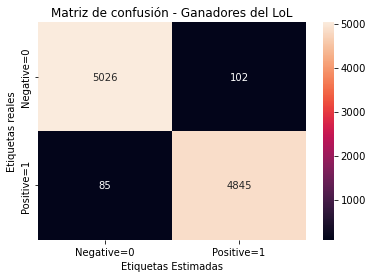

In [57]:
ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

### Modelo 2

In [58]:
modelo_lol2 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5,20,1,10), random_state=123)
modelo_lol2.fit(x_entrenamiento,y_entrenamiento)
scores2 = cross_val_score(modelo_lol2, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores2)
print(scores2.mean())

[0.97986577 0.98011434 0.98011434 0.97439722 0.98210291 0.97837435
 0.98011434 0.98284862 0.97886624 0.9808553 ]
0.9797653423199497


#### Vamos a predecir la presición del modelo

In [59]:
y_pred2 = modelo_lol2.predict(x_pruebas)

In [60]:
print("Modelo 2", accuracy_score(y_pruebas, y_pred2))

Modelo 2 0.9818055279379598


#### Matriz de confusión para el modelo 2

In [61]:
confusion_matrix2 = confusion_matrix(y_pruebas, y_pred2)
confusion_matrix2

array([[5045,   83],
       [ 100, 4830]], dtype=int64)

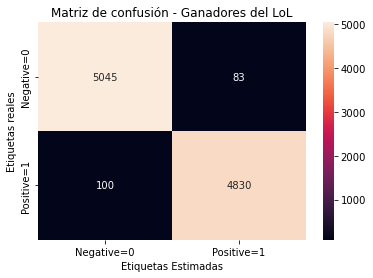

In [62]:
ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

### Modelo 3

In [63]:
modelo_lol3 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(10, 5, 1, 12), random_state=123)
modelo_lol3.fit(x_entrenamiento,y_entrenamiento)
scores3 = cross_val_score(modelo_lol3, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores3)
print(scores3.mean())

[0.97912006 0.97787721 0.97663435 0.9736515  0.9813572  0.97514293
 0.97738006 0.97812578 0.98135256 0.98135256]
0.9781994209575398


#### Vamos a predecir la presición del modelo

In [64]:
y_pred3 = modelo_lol3.predict(x_pruebas)
print(y_pred3)

[1 2 2 ... 2 1 2]


In [66]:
print("Modelo 3", accuracy_score(y_pruebas, y_pred3))

Modelo 3 0.9794193676675284


#### Matriz de confusión para el modelo 3

In [67]:
confusion_matrix3 = confusion_matrix(y_pruebas, y_pred3)
print(confusion_matrix3)

[[5027  101]
 [ 106 4824]]


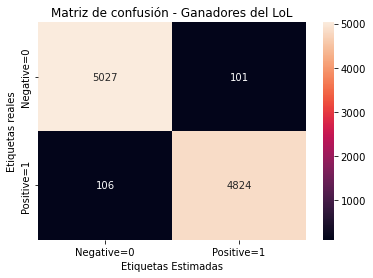

In [68]:
ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

### Modelo 4

In [69]:
modelo_lol4 = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,hidden_layer_sizes=(30, 30, 30), random_state=123)
modelo_lol4.fit(x_entrenamiento,y_entrenamiento)
scores4 = cross_val_score(modelo_lol4, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores4)
print(scores4.mean())

[0.97862292 0.97315436 0.97514293 0.97166294 0.97489436 0.97514293
 0.97762864 0.97588864 0.97488812 0.97787171]
0.9754897529162561


#### Vamos a predecir la presición del modelo

In [73]:
y_pred4 = modelo_lol4.predict(x_pruebas)
print(y_pred4)

[1 2 2 ... 2 1 2]


In [74]:
print("Modelo 4", accuracy_score(y_pruebas, y_pred4))

Modelo 4 0.9776297474647048


#### Matriz de confusión para el modelo 4

In [75]:
confusion_matrix4 = confusion_matrix(y_pruebas, y_pred4)
print(confusion_matrix4)

[[5002  126]
 [  99 4831]]


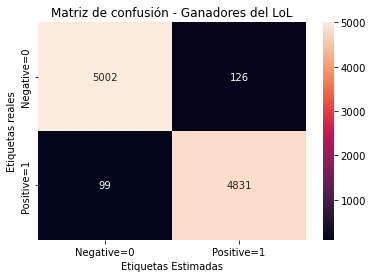

In [76]:
ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

### Modelo 5

In [84]:
modelo_lol5 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(10,1,20,1,30), random_state=123)
modelo_lol5.fit(x_entrenamiento,y_entrenamiento)
scores5 = cross_val_score(modelo_lol5, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores5)
print(scores5.mean())

[0.98036291 0.97837435 0.98036291 0.9736515  0.98110863 0.97762864
 0.97936863 0.98235148 0.9808553  0.98309299]
0.9797157332409754


#### Vamos a predecir la presición del modelo

In [87]:
y_pred5 = modelo_lol5.predict(x_pruebas)
print(y_pred5)

[1 2 2 ... 2 1 2]


In [89]:
print("Modelo 5",accuracy_score(y_pruebas, y_pred5))

Modelo 5 0.9814078345595546


#### Matriz de confusión para el modelo 5

In [91]:
confusion_matrix5 = confusion_matrix(y_pruebas, y_pred5)
print(confusion_matrix5)

[[4999  129]
 [  58 4872]]


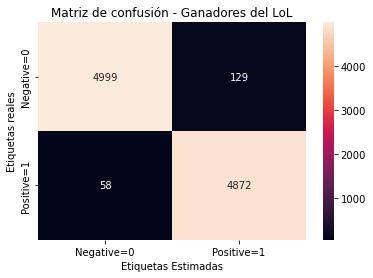

In [92]:
ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

## Tabla de resultados

|||| Accuracy Obtenido   ||||
| :--- | :--- | :--- | :----: | :----: |:----:  | :----: |
| __Modelo__ | __Activation__ | __Solver__ | __Alpha__ | __Hidden_layer_sizes__ | __Random_state__ | __Accuracy__ |
| 1 |logistic | lbfgs | 1e-5 | (10,8) | 123 | 0.9814078345595546|
| 2 |tanh | adam | 1e-5 | (5,20,1,10) | 123 | 0.9818055279379598 |
| 3 |tanh | sgd | 1e-5 | (10,5,1,12) | 123 | 0.9794193676675284 |
| 4 |relu | adam | 1e-5 | (30,30,30) | 123 | 0.9776297474647048 |
| 5 |tanh | adam | 1e-5 | (10,1,20,1,30) | 123 | 0.9814078345595546 |

### Los hiperparámetros utilizados en la prueba #2 fueron los que generar la mejor accuracy

### Modificación de un nuevo hiperparametro

### Modelo 6

In [95]:
modelo_lol6 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5,20,1,10), random_state=123, beta_1 = 0.5)
modelo_lol6.fit(x_entrenamiento,y_entrenamiento)
scores6 = cross_val_score(modelo_lol6, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores6)
print(scores6.mean())

[0.97936863 0.97837435 0.97638578 0.97514293 0.9813572  0.97688292
 0.98036291 0.98235148 0.97961213 0.97961213]
0.9789450465887779


#### Vamos a predecir la presición del modelo

In [97]:
y_pred6 = modelo_lol6.predict(x_pruebas)
print(y_pred6)

[1 2 2 ... 2 1 2]


In [98]:
print("Modelo 6",accuracy_score(y_pruebas, y_pred6))

Modelo 6 0.9820043746271625


#### Matriz de confusión para el modelo 6

In [99]:
confusion_matrix6 = confusion_matrix(y_pruebas, y_pred6)
print(confusion_matrix6)

[[5031   97]
 [  84 4846]]


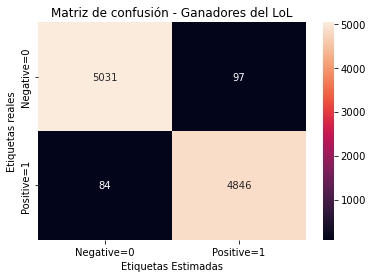

In [100]:
ax = plt.subplot()
sns.heatmap(confusion_matrix6, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

### Modelo 7

In [101]:
modelo_lol7 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5,20,1,10), random_state=123, beta_1 = 0)
modelo_lol7.fit(x_entrenamiento,y_entrenamiento)
scores7 = cross_val_score(modelo_lol7, x_entrenamiento, y_entrenamiento, cv = 10, scoring = 'accuracy')
print(scores7)
print(scores7.mean())

[0.97936863 0.94432016 0.93214019 0.95227442 0.95525727 0.9652001
 0.98061148 0.98260005 0.97911487 0.98234709]
0.9653234268446239


#### Vamos a predecir la presición del modelo

In [102]:
y_pred7 = modelo_lol7.predict(x_pruebas)
print(y_pred7)

[1 2 2 ... 2 1 2]


In [103]:
print("Modelo 7",accuracy_score(y_pruebas, y_pred7))

Modelo 7 0.9787234042553191


#### Matriz de confusión para el modelo 7

In [104]:
confusion_matrix7 = confusion_matrix(y_pruebas, y_pred7)
print(confusion_matrix7)

[[5085   43]
 [ 171 4759]]


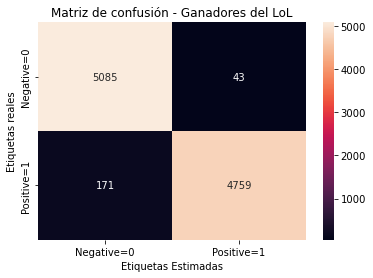

In [105]:
ax = plt.subplot()
sns.heatmap(confusion_matrix7, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Etiquetas Estimadas')
ax.set_ylabel('Etiquetas reales') 
ax.set_title('Matriz de confusión - Ganadores del LoL') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1'])
plt.show()

#### Se observa un aumento en la presición respecto a la prueba base sin el parámetro beta_1. Además mencionar que beta_1 = 0.5  arroja un mejor resultado.